In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

In [2]:
iris = load_iris()
x = iris.data
# Перші 5 рядків датасету
pd.DataFrame(x, columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


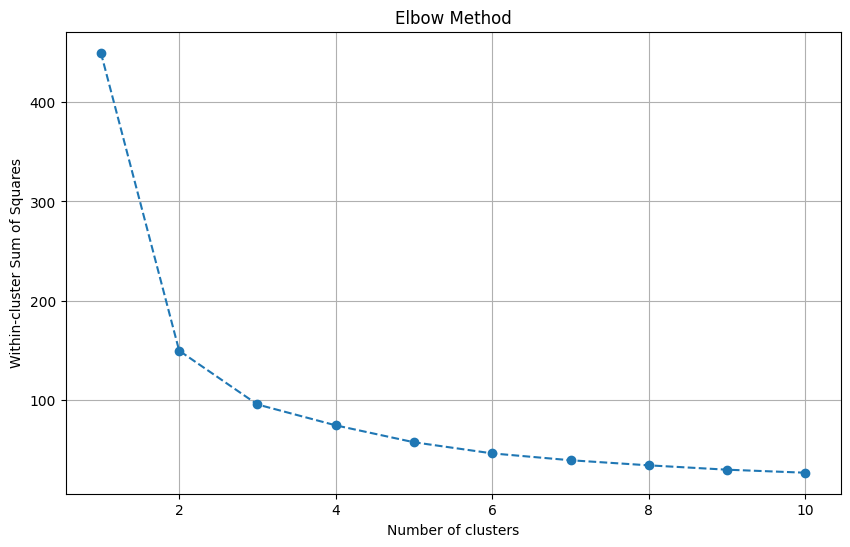

In [3]:
# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
# Вибір даних для кластеризації
X_2d = pd.DataFrame (X_scaled, columns=iris.feature_names).iloc[:, 1:]
# Застосування ліктевого методу для визначення оптимальної кількості кластерів
wcss_2d = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X_2d)
  wcss_2d.append(kmeans.inertia_)
# Візуалізація графіка
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_2d, marker='o', linestyle = '--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.grid(True)
plt.show()

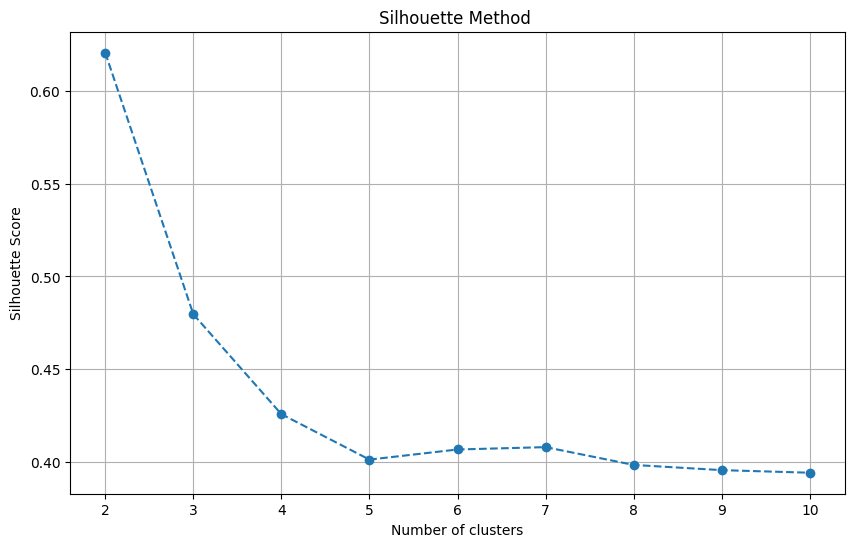

In [4]:
# Застосування методу силуетів
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  cluster_labels = kmeans.fit_predict(X_2d)
  silhouette_avg = silhouette_score (X_2d, cluster_labels)
  silhouette_scores.append(silhouette_avg)
# Візуалізація графіка
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle = '--')
plt.title('Silhouette Method ')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

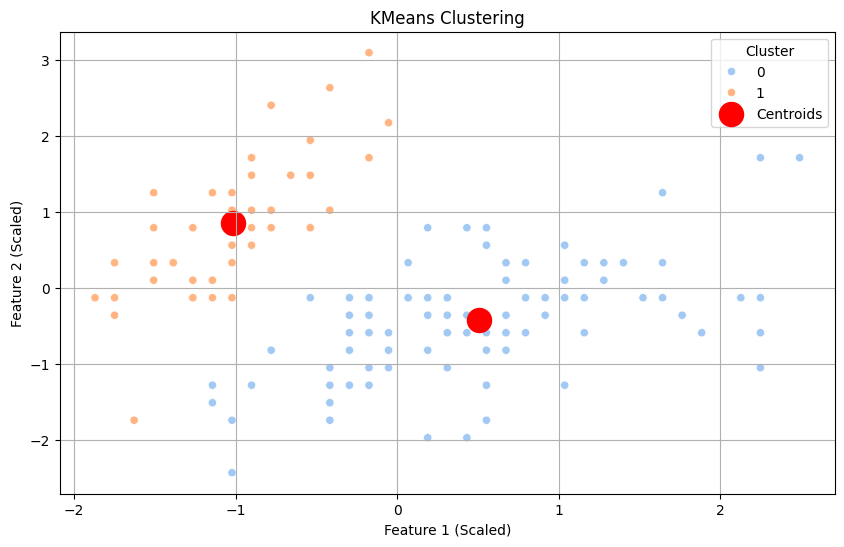

In [5]:
# Використання KMeans для кластеризації
kmeans = KMeans (n_clusters = 2, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
# Візуалізація кластерів
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue = clusters, palette='pastel', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

**Висновок:** Після успішного виконання кластеризації даних із датасету Iris я масштабував ознаки, потім застосував метод ліктя та метод силуетів для визначення оптимальної кількості кластерів (2). Далі використав алгоритм KMeans для розбиття даних на 2 кластери та візуалізував результати на графіку разом із центроїдами кластерів, що дозволило оцінити розподіл даних між кластерами.

**Завдання 2**

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
file_path='/content/drive/My Drive/Student_data.csv'
df = pd.read_csv(file_path)
# Виведення перших кількох рядків
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [8]:
# Розмір датасета.
print("Розмір датасета:")
df.shape
# Типи даних кожного стовбця
print("\nТипи даних кожного стовбця:")
df.dtypes

Розмір датасета:

Типи даних кожного стовбця:


,0
StudentID,int64
Age,int64
Gender,int64
Ethnicity,int64
ParentalEducation,int64
StudyTimeWeekly,float64
Absences,int64
Tutoring,int64
ParentalSupport,int64
Extracurricular,int64


In [9]:
#Перевірте наявність пропущених значень.
print("Пропущені значення:")
df.isnull().sum()

Пропущені значення:


,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


In [10]:
# Перевірка наявності дублікатів
print("Перевірка наявності дублікатів: ")
df.duplicated().sum()

Перевірка наявності дублікатів: 


0

In [11]:
#Описова статистика
print("Описова статистика: ")
df.describe()

Описова статистика: 


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [12]:
# Вибір ознак (Х) та цільової змінної (y)
X = df.drop('GradeClass', axis=1)
y = df['GradeClass']
# Розділення даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Масштабування ознак
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
#Random Forest
param_grid_rf = {
'n_estimators': [100, 200, 300],
'max_depth': [None, 10, 20, 30],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
# Найкращі параметри та точність
print("Найкращі параметри для Random Forest:", grid_search_rf.best_params_)
print("Найкраща крос-валідаційна точність для Random Forest:", grid_search_rf.best_score_)
# Оцінка на тестовій вибірці
y_pred_rf = grid_search_rf.predict(X_test)
print("Перевірка точності для Random Forest:", accuracy_score(y_test, y_pred_rf))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.9210640711932525
Test accuracy for Random Forest: 0.9123173277661796


In [14]:
# Логістична регресія
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C':[0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
lr = LogisticRegression(random_state=42, max_iter=1000)
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)
# Найкращі параметри та точність
print("Найкращі параметри для логістичної регресії:", grid_search_lr.best_params_)
print("Найкраща крос-валідаційна точність для логістичної регресії:", grid_search_lr.best_score_)
# Оцінка на тестовій вибірці
y_pred_lr = grid_search_lr.predict(X_test)
print("Перевірка точності для логістичної регресії:", accuracy_score(y_test, y_pred_lr))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation accuracy for Logistic Regression: 0.7710333137396963
Test accuracy for Logistic Regression: 0.7432150313152401


In [15]:
#Метод опорних векторів
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}
svm = SVC(random_state=42)
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, y_train)
# Найкращі параметри та точність
print("Найкращі параметри для SVM:", grid_search_svm.best_params_)
print("Найкраща крос-валідаційна точність для SVM:", grid_search_svm.best_score_)
# Оцінка на тестовій вибірці
y_pred_svm = grid_search_svm.predict(X_test)
print("Перевірка точності для SVM:", accuracy_score(y_test, y_pred_svm))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters for SVM: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Best cross-validation accuracy for SVM: 0.8557147348707502
Test accuracy for SVM: 0.824634655532359


In [16]:
# Виведення звіту про класифікацію для найкращої моделі
print("Classification report for the best model (Random Forest, Logistic Regression, or SVM):")
print(classification_report(y_test, y_pred_rf))

Classification report for the best model (Random Forest, Logistic Regression, or SVM):
              precision    recall  f1-score   support

         0.0       0.91      0.45      0.61        22
         1.0       0.77      0.88      0.82        49
         2.0       0.89      0.87      0.88        85
         3.0       0.90      0.90      0.90        86
         4.0       0.96      0.98      0.97       237

    accuracy                           0.91       479
   macro avg       0.88      0.82      0.83       479
weighted avg       0.91      0.91      0.91       479



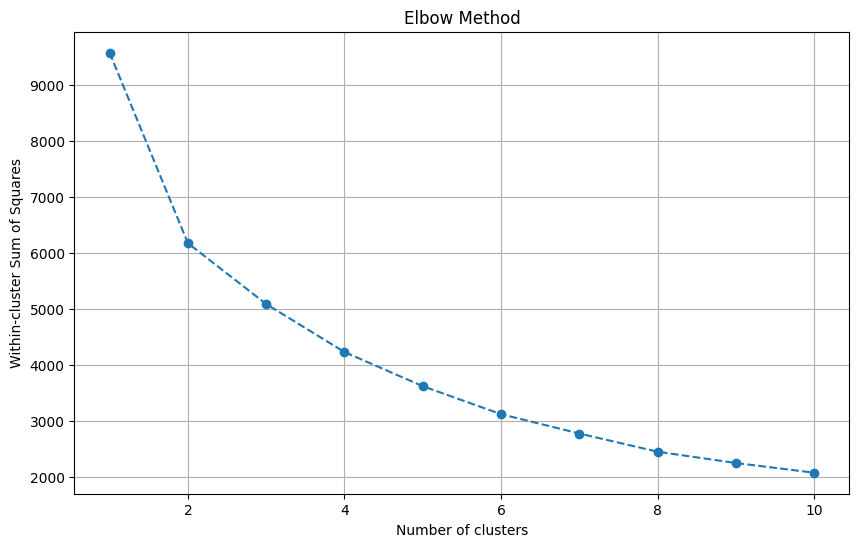

In [17]:
# Метод ліктя
features = df [['Age', 'StudyTimeWeekly', 'Absences', 'GPA']]
# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
wcss_2d = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X_scaled)
  wcss_2d.append(kmeans.inertia_)
# Візуалізація графіка
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_2d, marker='o', linestyle = '--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.grid(True)
plt.show()

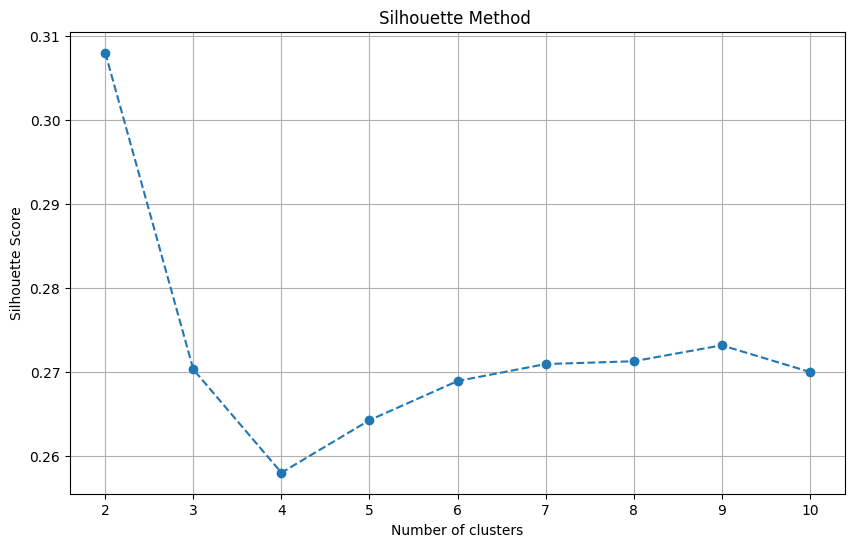

In [18]:
# Метод силуетів
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  cluster_labels = kmeans.fit_predict(X_scaled)
  silhouette_avg = silhouette_score (X_scaled, cluster_labels)
  silhouette_scores.append(silhouette_avg)
# Візуалізація графіка
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle = '--')
plt.title('Silhouette Method ')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Оптимальна кількість кластерів - 2.

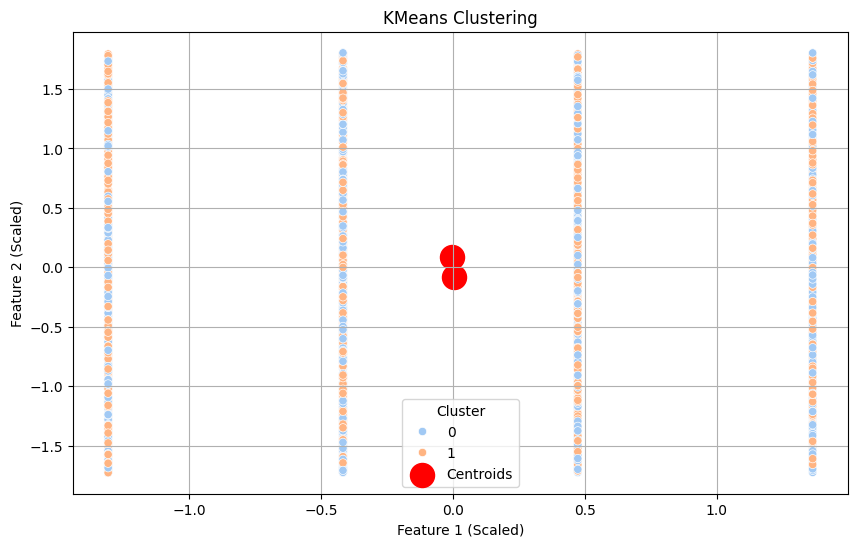

In [19]:
# Використання KMeans для кластеризації
kmeans = KMeans (n_clusters = 2, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
# Візуалізація кластерів
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue = clusters, palette='pastel', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

**Висновок:** У цьому завданні я працював з датасетом Student_data. Спочатку перевірив наявність пропущених значень і дублікатів, а також виконав описову статистику. Потім розділив дані на навчальну та тестову вибірки, масштабував ознаки і застосував три моделі: Random Forest, логістичну регресію та SVM. Найточнішою моделлю з трьох виявилася Random Forest. Я налаштував моделі за допомогою GridSearchCV для пошуку найкращих параметрів і оцінив їхню точність. Провів кластеризацію KMeans, використав метод ліктя та силуетів для вибору кількості кластерів.